In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed, uniform, randn
from scipy.stats import norm


In [2]:
def kernel_regr(x, X, t, sigma):

    pdf_vals = norm.pdf(x - X.reshape(10,1), loc=0, scale=sigma).T
    pdf_vals = pdf_vals / pdf_vals.sum(axis=1, keepdims=True)
    expectation = (pdf_vals * t.reshape(1,10)).sum(axis=1)
    cond_variance = np.sqrt(sigma ** 2 + (pdf_vals * t.reshape(1,10) ** 2).sum(axis=1) - expectation ** 2)
    return expectation, cond_variance


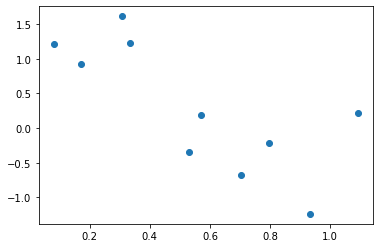

In [3]:
seed(1800)
n = 10
X = np.linspace(0, 1, n) + uniform(size=n) * 0.1
t = np.sin(2 * np.pi * X) + randn(n) * 0.4
plt.scatter(X, t)
plt.show()

Text(0.5, 0.98, 'Isotropic Kernel Regression')

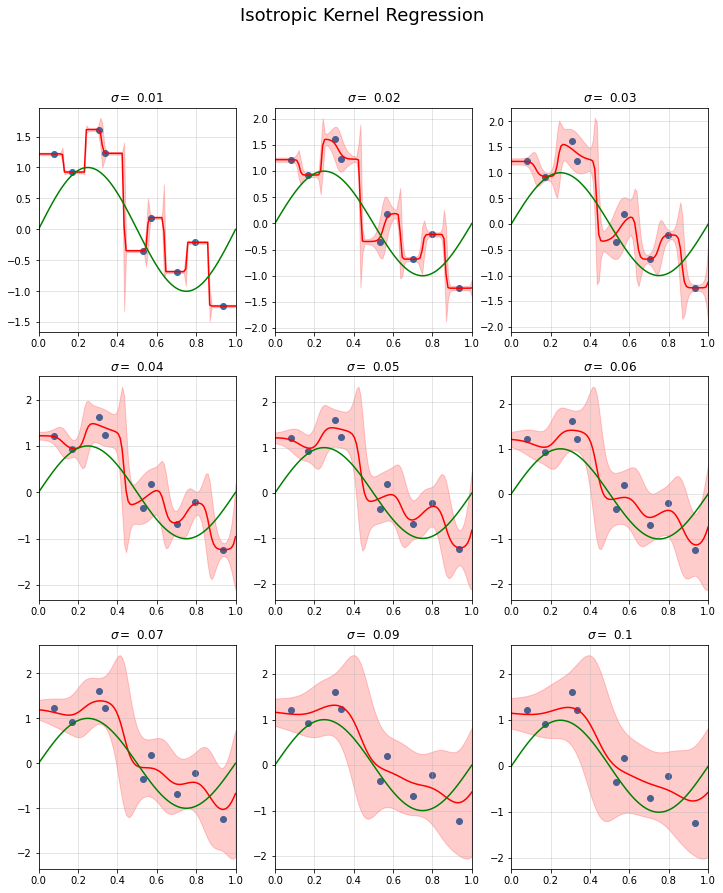

In [4]:
x = np.linspace(0, 1, 100)
sigmas = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.1]
fig, axes = plt.subplots(3, 3, figsize=(12,14))
for sigma, ax in zip(sigmas, axes.ravel()):
    expectation,cond_var = kernel_regr(x, X, t, sigma)
    ax.scatter(X, t)
    ax.plot(x, expectation, color="red")
    ax.fill_between(x, expectation - 2 * cond_var, expectation + 2 * cond_var, alpha=0.2, color="red")
    ax.plot(x, np.sin(x * 2 * np.pi), c="green")
    ax.grid(alpha=0.4)
    ax.set_title( r"$\sigma=$ " f"{sigma}")
    ax.set_xlim(0, 1);
plt.suptitle("Isotropic Kernel Regression", fontsize=18)

Text(0.5, 0.98, 'Final expectation over target values')

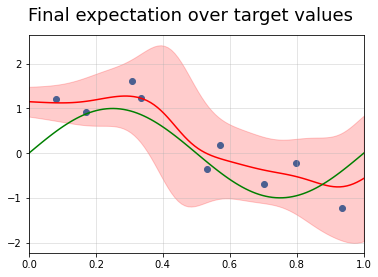

In [5]:
expectation,cond_var = kernel_regr(x, X, t, 0.1)
plt.scatter(X, t)
plt.plot(x, expectation, color="red")
plt.fill_between(x, expectation - 2 * cond_var, expectation + 2 * cond_var, alpha=0.2, color="red")
plt.plot(x, np.sin(x * 2 * np.pi), c="green")
plt.grid(alpha=0.4)
plt.xlim(0, 1);
plt.suptitle("Final expectation over target values", fontsize=18)
